# Welcome to Week 5: Exhaustive Search \& Brute Force Search

In this week's programming exercise, we will look at algorithms that are designed to systematically find solutions for problems in a "dumb" way. This means that they are theoretically not optimized to find solutions fast nor efficiently. Note, that designing an efficient algorithm is different from implementing it efficiently. These kinds of algorithms are often called brute force algorithms, as it is effectively just throwing a lot of computer power at the problem, or exhaustive search which stands for just exhausting all options to find a solution. 

Throughout the exercise, you will be extending the classes by completing code stubs in their respective cells. You do not need to copy the code, it is enough to work in the cell under each exercise. Note that there are separate cells provided where you can (and should) test your code. During the exercises, you will (through customMagics) obtain a Python file (.py) which you should run against a set of unittests. Please avoid writing any unnecessary code in cells containing the `%%execwritefile` command. Doing this could alter the file `.py` and make it syntactically incorrect or interfere with the unittests. To prevent this stick to the following rules:'
 - ***Do not remove cells that start with ``%%execwritefile`` and do not remove that line.***
 - If a cell contains a `%%execwritefile` command at the top and a class definition you need to complete the given methods and adding helper methods is allowed, but do **not** add new functions or Python script to the cells (like global variables).
 - If a cell contains a `%%execwritefile` command at the top and **not** a class definition you must complete the given functions and you are free to add helper functions, new classes, and Python script that contains for example global variables. Note, that the use of global variables is almost always wrong except for a few use cases such as RNG for the numpy random generator methods.
 - If a cell does **not** contain a `%%execwritefile` command you can plot things, print variables, and write test cases. Here, you are free to do whatever you want.
 - If a cell does **not** contain a `%%execwritefile` command it should not contain functional code that is needed to run other functions or classes. The reason is that it is not copied to the `.py`. So, it can not be used during the unittesting.

You do not need to look at the `customMagic.py` nor do more than glimpse at the test file, your exercise is contained in this workbook unless specified differently in this notebook's instructions. 

***Hint: Jupyter Notebooks saves variables between runs. If you get unexpected results try restarting the kernel, this deletes any saved variables.*** 

Please fill in your student name down below

In [1]:
# FILL IN YOU STUDENT NUMBER
student = 3893995

# Set this to false if you want the default screen width.
WIDE_SCREEN = True

In [2]:
from custommagics import CustomMagics
import timeit
import matplotlib.pyplot as plt

if WIDE_SCREEN:
    import notebook
    from IPython.display import display, HTML

    if int(notebook.__version__.split(".")[0]) >= 7:    
        display(HTML(
            '<style>'
                '.jp-Notebook { padding-left: 1% !important; padding-right: 1% !important; width:100% !important; } '
            '</style>'
        ))
    else:
        display(HTML("<style>.container { width:98% !important; }</style>"))

get_ipython().register_magics(CustomMagics)



In [3]:
%%execwritefile exercise5_{student}_notebook.py 0 

# DO NOT CHANGE THIS CELL.
# THESE ARE THE ONLY IMPORTS YOU ARE ALLOWED TO USE:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy
from tree import hierarchy_pos

RNG = np.random.default_rng()

Writing exercise5_3893995_notebook.py


# 1.0 Nearest Neighbour Problem

A common problem in AI is finding the nearest neighbor of a vector in some vector space. While there are smart ways of doing this it is often done with brute force where the distance is calculated between all vectors and the current vector and the neighbour with the shortest distance is of course the nearest neighbour. So, to solve it we need to generate all distances and then choose the smallest one. In the image below, you can find an example of why finding the nearest neighbor can be helpful in AI. Here, you see three groups of points that belong to the same group and you want to know to which group the new point (denoted with an "x") belongs to. Here, the answer is probably orange (group 2). Doing a nearest neighbour search would be one way to group new points.

<img src="clustering.png" alt="drawing" width="350"/>

Below, you will implement two functions. In the first functions, you will implement a nearest neighbour search and, in the second function, you will use this to determine the group of the new point. 

## 1.1 Find Nearest Neighbour

Implement `nearest_neighbour` and `distance`. `distance` can be used as a helper function to calculate the distance between two 2Dvectors.

In [4]:
%%execwritefile exercise5_{student}_notebook.py 10 -a -s

def distance(pointA, pointB):
    """
    This calculates the Euclidean distance between two points: https://en.wikipedia.org/wiki/Euclidean_distance

    :param pointA: The first coordinate
    :type pointA: list[float] or np.ndarray[(2,), float]
    :param pointB: The second coordinate
    :type pointB: list[float] or np.ndarray[(2,), float]
    :return: The distance between the two points
    :rtype: float
    """
    return np.linalg.norm(np.array(pointA) - np.array(pointB))

def nearest_neighbour(data, point):
    """
    This function finds the nearest neighbour of "point" in the "data".

    :param data: All the points (neighbours) that need to be compared to "point".
    :type data: np.ndarray[(n, 2), float]
    :param point: The point of which you want to find the closest neighbour.
    :type point: list[float] or np.ndarray[(2,), float]
    :return: The nearest neighbour and the distance to that neighbour.
    :rtype: tuple[np.ndarray[(2,), float], float]
    """
    return min([(neighbour, distance(neighbour, point)) for neighbour in data if not np.array_equal(neighbour, point)], key=lambda x: x[1])

Appending to exercise5_3893995_notebook.py


## Test your code

Below, you can test your code for the function `nearest_neighbour` and `distance`. No example tests are given, so think of a way to properly test the functions and do it.

In [5]:
# Type here your tests

data = np.array([[0, 0], [1, 1], [2, 2], [3, 3], [4, 4]])
point = [0, 1]
print(nearest_neighbour(data, point))

(array([0, 0]), 1.0)


## 1.2 Find Nearest Group

Implement `classify_point` by going through all the groups and check which group has the nearest neighbour.

In [6]:
%%execwritefile exercise5_{student}_notebook.py 15 -a -s

def classify_point(data, point):
    """
    This function finds the nearest group based on the nearest neighbour of each group.
    Use `nearest_neighbour` in this function.

    :param data: A list of groups, where each group consists of all the points (neighbours) that need to be compared to "point".
    :type data: list[np.ndarray[(Any, 2), float]]
    :param point: The point of which you want to find the closest group.
    :type point: list[float] or np.ndarray[(2,), float]
    :return: The nearest group and the nearest neighbour.
    :rtype: tuple[int, np.ndarray[(Any, 2), float]]
    """
    return min([(i, nearest_neighbour(group, point)) for i, group in enumerate(data)], key=lambda x: x[1][1])

Appending to exercise5_3893995_notebook.py


## Test your code

Below, you can test your code for the function `classify_point`. An example demo is already included where each group is printed as well as the nearest neighbour of each group.

The nearest neighbour of point (5, 5) is (array([5.01875823, 4.29031185]), 0.7099360073630304) which belongs to group 1.


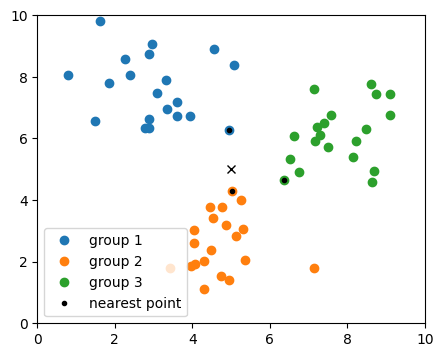

In [7]:
plt.matplotlib.rcParams['figure.figsize'] = [5, 4]  # This changes the size of the plot

"""
Below you can change the parameters of the demo
"""
centers = [(3, 8), (5, 3), (8, 6)]  # this changes where approximately the middle of each group is
n_points = 20  # The number of points of each group
new_point = (5,5)  # The coordinate of the new point

"""
You do not need to change the code below for the demo.
"""
data = []
for i, (x, y) in enumerate(centers):
    data.append(np.array(list(zip(RNG.normal(x, 1, n_points), RNG.normal(y, 1, n_points)))))
    plt.plot(data[-1][:,0], data[-1][:,1], 'o', label=f"group {i+1}")

plt.plot(*nearest_neighbour(data[0], new_point)[0], 'k.', label="nearest point")
plt.plot(*nearest_neighbour(data[1], new_point)[0], 'k.')
plt.plot(*nearest_neighbour(data[2], new_point)[0], 'k.')

nearest_group, nearest_point = classify_point(data, new_point)
print(f"The nearest neighbour of point {new_point} is {tuple(nearest_point)} which belongs to group {nearest_group}.")

plt.plot(*new_point, 'x', color='k')
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

# 2.0 Exhaustive Search

Last week, we implemented a couple of algorithms for problems that require exhaustive search. So, if you did not do the permutation problem or the Manhattan problem you can do them for this week as well as they are good exercises for exhaustive search. However, if you have already done them, look back at them and see why they are exhaustive search algorithms.

# 2.1 Multiple Ring Puzzle

Often puzzles in games can be solved with exhaustive search, not only because of their form but also because their search-space is small enough to make this strategy feasible. In this exercise, we will solve a puzzle that consists of multiple rings that need to be turned until the right combination is found which unlocks the door. Each ring has three possibilities A, B, and C, see below for an abstract image where the current combination is "A A A". Work out what the search-space is, how many combinations there are, and why this strategy is feasible to do when gaming. This problem has size 3 as it contains 3 rings , however, you could at more rings how will this affect the algorithm? In other words, what is the complexity of this puzzle and what would you say that the limit is how big this problem can grow before it would not be possible to use exhaustive search? 

<img src="door.png" alt="drawing" width="250"/>

Below, you can find the datastructure for the `DoorRingPuzzle`, your goal is to open the door by turning the rings, `turn_ring`. To check if the door opens you can use `open_door`. You are not allowed to change the datastructure or directly modify the attributes of both classes. However, study both classes `Ring` and `DoorRingPuzzle` to understand how they work and then write an exhaustive search algorithm to solve the problem.

This week we will continue using the framework for last week. So, complete the class `SolveDoorRingPuzzle`. We will use depth-first search to find all solutions for the exhaustive search.

***Before, you start programming think about how to the problem on paper and think about a pseudo algorithm.***

In [8]:
%%execwritefile exercise5_{student}_notebook.py 20 -a -s

class Ring():
    """
    One ring of the door.
    """
    def __init__(self, current=0, size=3):
        """
        Attributes:
            :param current: Current value that is on top of the ring.
            :type current: int
            :param size: The number of options that this ring has.
            :type size: int
            :param answer: the correct position of this ring.
            :type answer: int            
        """
        self.__current = current
        self.__size = size
        self.__answer = RNG.integers(size)

    def turn(self):
        """
        This method turns the ring clockwise and
        returns if the ring is in the original order.

        :return: if the ring is in the original order.
        :rtype: boolean
        """
        self.__current = (self.__current + 1) % self.__size
        return not self.__current

    def correct(self):
        """
        This method check if the ring is currently in the right position.
        """
        return self.__current == self.__answer
        
    def __repr__(self):
        return f"Ring({chr(self.__current + 65)})"

class DoorRingPuzzle():
    """
    This class represents a door with a certain amount of rings 
    that need to be positioned in the correct order to open the door.
    """
    def __init__(self, n_rings=None, size=3):
        """
        This initialized the door. 
        
        Attributes:
            :param rings: The rings of the door.
            :type rings: list[Ring}


        :param n_rings: The number of rings this door has, defaults to 3
        :type n_rings: int, optional
        :param size: The size of each ring (number of options), defaults to 3
                     This can also be a list with the size of each individual ring.
                     This list should have the same length as n_rings.
        :type size: list[int] or int, optional
        """
        if not isinstance(size, int):
            if n_rings != len(size) and not n_rings is None:
                raise ValueError("The number of rings should be equal to the number of sizes that are given for each individual ring!")
            self.__rings = [Ring(0, s) for s in size]            
        else:
            if n_rings is None:
                n_rings = 3
            self.__rings = [Ring(0, size) for _ in range(n_rings)]

    def turn_ring(self, ring):
        """
        This method can rotate one ring clockwise.
        It also tells the user if the ring is back in its original position.
        Thus with the "A" on top.

        :param ring: The ring that is rotated.
        :type ring: int
        :return: If the ring is in its original position.
        :rtype: boolean
        """
        return self.__rings[ring].turn()

    def open_door(self):
        """
        This method checks if you can open the door.

        :return: If opening the door succeeded.
        :rtype: boolean
        """
        for ring in self.__rings:
            if not ring.correct():
                return False
        return True

    def __len__(self):
        """
        This gives the length of the door which
        is defined as the number of rings.
        """
        return len(self.__rings)

    def __repr__(self):
        return str(self.__rings)    

Appending to exercise5_3893995_notebook.py


In [9]:
%%execwritefile exercise5_{student}_notebook.py 25 -a -s

class SolveDoorRingPuzzle():
    def __call__(self, door):
        """
        This method solves the door with "n" rings problem.
        You do not need to return anything because of side effects.
        See, this exercise of ITP on an explanation of side effects:
        https://joshhug.github.io/LeidenITP/labs/lab7/#exercise-1-shopping-list-standard

        :param door: The door that needs to be opened.
        :type door: DoorRingPuzzle
        """
        self.door = door
    
    def step(self, ring):
        """
        This is one step in the exhaustive search algorithm which uses depth-first search.

        :param ring: The ring that is currently turned.
        :type ring: int
        :return: If the door is opened in the current configuration.
        :rtype: boolean
        """
        if ring == len(self.door):
            return self.door.open_door()
        if self.door.turn_ring(ring):
            return self.step(ring + 1)
        return self.step(ring)
            
    def next_step(self, ring):
        """
        This determines the next step in the exhaustive search.
    
        :param ring: The ring that is currently turned.
        :type ring: int
        :return: This method returns what self.step returns
        :type: boolean
        """
        return self.step(ring)


Appending to exercise5_3893995_notebook.py


## Test your code

Below, you can test your code for `SolveDoorRingPuzzle`. Note, that only a basic example is given. Write tests for other examples yourself.

In [10]:
door = DoorRingPuzzle()
SolveDoorRingPuzzle()(door)
door.open_door(), door

(False, [Ring(A), Ring(A), Ring(A)])

# 3.0 Ternary Tree 

In the second lab, we made binary trees and binary search trees and you probably noticed that the binary search tree algorithms were easier to implement because there was just a straightforward algorithm that led to the answer and you did not have to do any searching. For example, to find the highest value in a binary search tree you can just traverse the tree by always taking the right `node` until the next one is None, while for a binary tree, you need to go through the whole tree and to find the highest value. So was finding the highest number in a binary tree exhaustive search? Try to find out by looking at your code for lab 2. 

In this exercise, we will implement an exhaustive search using a depth-first search approach to find a value in a ternary tree. The approach should be very similar to finding a value in a binary tree. However, before we can search a tree we need to make the tree. Therefore, you need to implement an add method for a ternary tree. Before, you implement the `add` method make sure you understand the `Node` class.

In [11]:
%%execwritefile exercise5_{student}_notebook.py 30 -a -s

class Node():
    def __init__(self, value, left=None, middle=None, right=None):
        """
        This is a node for a ternary tree.

        Attributes:
            :param info: The value of the node.
            :type: info: int
            :param left: The left child of the node, defaults to None
            :type left: Node, optional
            :param middle: The left child of the node, defaults to None
            :type middle: Node, optional
            :param right: The left child of the node, defaults to None
            :type right: Node, optional
        """
        self.info = value
        self.left = left
        self.middle = middle
        self.right = right

    def __repr__(self):
        return f"Node({self.info}) -> {self.left.info if self.left is not None else 'None', self.middle.info if self.middle is not None else 'None', self.right.info if self.right is not None else 'None'}"

class TernaryTree():
    def __init__(self):
        """
        This initializes the tree which is always initialized as an empty tree.

        Attributes:
            :param root: The root of the tree
            :type root: Node
        """
        self.root = None

    def add(self, value):
        """
        Randomly add values to the tree.
        You could do this by randomly traversing the tree and 
        add a new node when a empty leaf node is found.

        :param value: The value that is added to the tree
        :type value: int       
        """
        if self.root is None:
            self.root = Node(value)
        else:
            self.__add(value, self.root)  

    def show(self):
        """
        This method shows the tree, where the root node is colored blue, 
        the left nodes are colored green, and the right nodes are colored red.
        """
        if self.root is None:
            raise ValueError("This is an empty tree and can not be show.")
            
        # Recursively add all edges and nodes.
        def add_node_edge(G, color_map, parent_graph_node, node):
            # In case of printing a binary tree check if a node exists
            if node.info in G:
                i = 2
                while f"{node.info}_{i}" in G:
                    i += 1
                node_name = f"{node.info}_{i}"
            else:
                node_name = node.info
            G.add_node(node_name)

            # Make root node or edge to parent node
            if parent_graph_node is not None:
                G.add_edge(parent_graph_node, node_name)
            
            if node.left is not None:
                add_node_edge(G, color_map, node_name, node.left)
            if node.middle is not None:
                add_node_edge(G, color_map, node_name, node.middle)
            if node.right is not None:
                add_node_edge(G, color_map, node_name, node.right)
        
        # Make the graph
        G = nx.DiGraph()
        color_map = []
        add_node_edge(G, color_map, None, self.root)
        name_root = self.root.info

        # Generate the node positions
        pos = hierarchy_pos(G, root=self.root.info, leaf_vs_root_factor=1)
        new_pos = {k:v for k,v in pos.items() if str(k)[0] != 'N'}
        k = G.subgraph(new_pos.keys())

        nx.draw(k, pos=new_pos, with_labels=True, node_size=1000)

        # Set the plot settings
        x, y = zip(*pos.values())
        x_min, x_max = min(x), max(x)
        plt.xlim(1.015*x_min-0.015*x_max, 1.015*x_max-0.015*x_min)
        plt.ylim(min(y)-0.08, max(y)+0.08)
        plt.show()

Appending to exercise5_3893995_notebook.py


## Test your code

Below, you can test your code for the method `add`. Make sure that if you add an element to the tree, it works as intended. Note, that similar to lab 2 it is possible to `show` the tree.

In [12]:
plt.matplotlib.rcParams['figure.figsize'] = [20, 4]  # This changes the size of the plot
# type your test code here
tree = TernaryTree()
tree.add(1)

## 3.1 Exhaustive Ternary Tree Search

Now, that we can make a tree, implement an exhaustive search algorithm that finds a node or returns `None` if the ndde is not found.

So far, we had a class that only did the exhaustive search algorithm. However, this time we have already a class `TernaryTree` and we add a search method to the class instead of `__call__`. To help structure the code we can use two internal helper methods `_step`. It is made static because it does not use the class itself, so it does not need the argument `self`. However, it definitely belongs to the class as it is a helper method of `search`.

In [13]:
%%execwritefile exercise5_{student}_notebook.py 35 -a -s -c

class TernaryTree(TernaryTree):
    def search(self, value):
        """
        This method search for a node with the value "value".
        If the node is not found it returns None.

        :param value: The value that is search for.
        :type value: int
        :return: This returns the node
        :rtype: Node
        """
        if self.root is None:
            return None
        return self._step(self.root, value)
        
    @staticmethod
    def _step(current_node, value):
        """
        This is a recursive helper method for "search".
        This makes it possible to do the exhaustive search.
        
        :param value: The value that is search for.
        :type value: int
        :param current_node: The current node in the Ternary tree.
        :type current_node: Node
        :return: This returns the node
        :rtype: Node
        """
        if current_node.info == value:
            return current_node
        if current_node.left is not None:
            result = TernaryTree._step(current_node.left, value)
            if result is not None:
                return result
        if current_node.middle is not None:
            result = TernaryTree._step(current_node.middle, value)
            if result is not None:
                return result
        if current_node.right is not None:
            result = TernaryTree._step(current_node.right, value)
            if result is not None:
                return result
        return None
    

Appending to exercise5_3893995_notebook.py


## Test your code

Below, you can test your code for the method `search`.

In [14]:
plt.matplotlib.rcParams['figure.figsize'] = [20, 4]  # This changes the size of the plot
# type your test code here
tree = TernaryTree()
tree.add(1)


# 4.0 Hamiltonian circuits

## ***All exercises below are additional content for extra practice, they only count for a small percentage of the bonus (TestExpert). So, you can skip to section [5.0 Unittests](#5.0-UNITTESTS) if you do not want to do these exercises.***

In the theory, you created a pseudo algorithm to find all possible Hamiltonian circuits (question 1c). Here, we will implement that algorithm and use it to find the shortest Hamiltonian circuit. This is a version of the Traveling Sales Problem as you also return to your start position. One way to brute force a solution is to use exhaustive search to find all possible paths and then check them one by one which is the shortest route.

You should have already written code to create the Hamiltonian circuits, otherwise, do problem set 4 first. Therefore, only one function is provided which should return the shortest path given a completely undirected graph (also called a fully connected graph). Also, the undirect graph class is given. 

Hint: It is recommended to first make all Hamiltonian circuits and then check the length of each one of them. 

In [15]:
%%execwritefile exercise5_{student}_notebook.py 40 -a -s

class CompleteGraph():
    def __init__(self, size=5):
        """
        This initializes a complete graph with a certain size.
        The internal representation is an adjacency matrix.

        :param size: The size of the graph, i.e., the number of nodes.
        :type size: int
        """
        self.adjacency_matrix = np.zeros((size, size))
        for i in range(size):
            for j in range(i):
                self.adjacency_matrix[i, j] = self.adjacency_matrix[j, i] = RNG.integers(1, 10)

    def __getitem__(self, index):
        """
        This makes the graph indexable as if you are directly indexing "self.adjacency_matrix"
        """
        return self.adjacency_matrix[index]

    def __repr__(self):
        return repr(self.adjacency_matrix)
            
    def show(self):
        """
        This method shows the current graph.
        """
        graph = nx.from_numpy_array(self.adjacency_matrix, create_using=nx.DiGraph)
        pos = nx.shell_layout(graph)
        edge_labels = nx.get_edge_attributes(graph, "weight")
        nx.draw_networkx(graph, 
                         pos,
                         with_labels=True,
                         node_size=400,
                         width=2,
                         arrowsize=15)
        nx.draw_networkx_edge_labels(graph, pos, edge_labels, label_pos=0.15, font_size=10)
        plt.show()

def find_shortest_circuit(graph):
    """
    This function finds the shortest Hamiltonian circuit in a graph and
    returns the path and the length of this path.

    :param graph: The graph
    :type graph: CompleteGraph
    :return: The shortest circuit and its cost
    :rtype: tuple[tuple[int], int]
    """
    # Define a helper function to generate all possible permutations of nodes
    def generate_permutations(nodes):
        if len(nodes) <= 1:
            yield nodes
        else:
            for i in range(len(nodes)):
                for perm in generate_permutations(nodes[:i] + nodes[i+1:]):
                    yield (nodes[i],) + tuple(perm)

    min_cost = float('inf')
    shortest_circuit = None

    # Generate all possible Hamiltonian circuits
    for perm in generate_permutations(list(range(len(graph.adjacency_matrix)))):
        # Ensure that the circuit is closed
        perm += (perm[0],)
        cost = length_of_circuit(graph, perm)
        if cost < min_cost:
            min_cost = cost
            shortest_circuit = perm

    return shortest_circuit, min_cost


def length_of_circuit(graph, cycle):
    """
    This is a helper function to calculate the length of one circuit.

    :param graph: The graph which the cycle traverses
    :type graph: CompleteGraph
    :param cycle: The cycle that encodes the circuit. 
                  This should be just a list of nodes.
    :type cycle: list[int]
    :return: The length of this circuit
    :rtype: int
    """
    # Sum up the weights of the edges in the cycle
    total_length = sum(graph.adjacency_matrix[cycle[i], cycle[i + 1]] for i in range(len(cycle) - 1))
    return total_length

Appending to exercise5_3893995_notebook.py


## Test your code

Below, you can test your code for the function `find_shortest_circuit`. A simple example is already given. Make sure you also test different graphs with different sizes.

array([[0., 2., 7., 6.],
       [2., 0., 8., 2.],
       [7., 8., 0., 7.],
       [6., 2., 7., 0.]])
((0, 1, 3, 2, 0), 18.0)


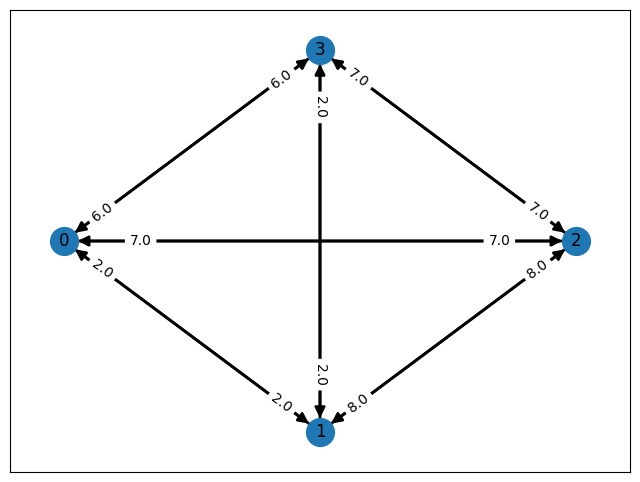

In [16]:
plt.matplotlib.rcParams['figure.figsize'] = [8, 6]  # This changes the size of the plot

g = CompleteGraph(4)
print(g)
print(find_shortest_circuit(g))
g.show()

# 5.0 UNITTESTS

During this assignment, we copied all your code to the following **.py** file **"exercise5_{student}_notebook.py"**. You also tested your code along the way. However, it is possible that there are still a few errors. Therefore, it is good to run some unittest when you complete all coding. This gives you an extra chance to spot mistakes. Here, we added some unittest for you to use. Note, that they are merely a check to see if your **.py** is correct.

From this point onwards we strongly advise renaming the **"exercise5_{student}_notebook.py"** file to the correct file name that you need to hand in **"exercise5_{student}.py"**. Now, you can adjust the **"exercise5_{student}.py"** file without the risk of overwriting it when you run the notebook again. This also enables the possibility to run the unittests. Note, that from now on if you make a change in the Python file and you want to go back to the notebook later that you also make this change in the notebook. To run the unittests go to the **"unit_test.py"** file and run the file in either PyCharm, VSCode, or a terminal. You can run it in a terminal using the following command: `python -m unittest --verbose unit_test.py`. `--verbose` is optional but gives you more details about which tests fail and which succeed.

You are allowed to add your own unittests. 

## Uploading to Brightspace for Bonus

Next, you can upload your Python file with the correct name on brightspace in the bonus assignment. Follow the instructions on this brightspace page carefully to have a successful submission. After you get the feedback for this exercise you can either continue working in the Python file to fix possible bugs or you can go back to the notebook and remake the Python file. ***Please be careful, do not update your code in both the Python file and notebook at the same time!***. If you go back to the notebook do not forget to update the notebook with any changes you made within the Python file. In this case, it is best to just delete the Python file as soon as you copied all changes.

***NOTE, that you can now also upload the exercises from week 1! The process is exactly the same only there is no unittest.***